<a href="https://colab.research.google.com/github/Aaditya-Prasad/PetTalk/blob/main/PetTalkOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#OBJECT DETECTION
#I: One image
#O: One outline drawn over the input image + species of pet
#Notes: Trying to use one of the effecientnet models perhaps that my phone can run, but not needed

In [ ]:
#Semantic Classification
#I: Species of pet
#O: list of adjectives that describe pet
#Notes: could just be an API call

In [8]:
pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from google.cloud import vision
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import time
import copy
import os
import cv2 as cv

In [107]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/pettalk-376101-8808a250a30c.json"

In [108]:
def detect_labels(path):
    import io
    import os
    # Imports the Google Cloud client library
    from google.cloud import vision
    # Instantiates a client
    client = vision.ImageAnnotatorClient()
    # The name of the image file to annotate
    file_name = os.path.abspath(path)
    # Loads the image into memory
    with io.open(file_name, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations
    return labels

In [109]:
def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with open(path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    objects = client.object_localization(
        image=image).localized_object_annotations

    return objects

In [110]:
def labels_to_array(labels):
  return [t.description for t in labels]

def cutout(path):
  img = cv.imread(path)
  x, y, _ = img.shape
  objs = localize_objects(path)
  ver = objs[0].bounding_poly.normalized_vertices[:]
  x_b = (int(ver[0].x * x), int(ver[1].x * x))
  y_b = (int(ver[1].y * y), int(ver[2].y * y))
  return cutout, img[x_b[0]:x_b[1], y_b[0]:y_b[1]]
  
def compute(path):
  labels = labels_to_array(detect_labels(path))
  bbox, cut_img = cutout(path)
  return labels, bbox, cut_img
  

In [114]:
a, b, c = compute('/duke.jpg')
a

['Dog',
 'Comfort',
 'Carnivore',
 'Dog breed',
 'Fawn',
 'Companion dog',
 'Couch',
 'Snout',
 'Toy dog',
 'Paw']

In [115]:
attributes = []
bboxes = []
cut_imgs = []
for i in range(26):
  a, b, c = compute(f"/dogs/{i}.jpeg")
  attributes.append(a)
  bboxes.append(b)
  cut_imgs.append(c)


In [118]:
attributes

[['Dog',
  'Carnivore',
  'Dog breed',
  'Companion dog',
  'Grass',
  'Snout',
  'Working animal',
  'Terrier',
  'Groundcover',
  'Canidae'],
 ['Dog',
  'Water dog',
  'Dog breed',
  'Carnivore',
  'Companion dog',
  'Flooring',
  'Toy dog',
  'Liver',
  'Sporting Group',
  'Wood'],
 ['Dog',
  'Dog breed',
  'Carnivore',
  'Herding dog',
  'Snout',
  'Sporting Group',
  'Canidae',
  'German shepherd dog',
  'Terrestrial animal',
  'Old german shepherd dog'],
 ['Dog',
  'Bulldog',
  'Carnivore',
  'Grass',
  'Dog breed',
  'Fawn',
  'Companion dog',
  'Plant',
  'Collar',
  'Snout'],
 ['Dog',
  'Dog breed',
  'Collar',
  'Companion dog',
  'Fawn',
  'Carnivore',
  'Tail',
  'Snout',
  'Canidae',
  'Sporting Group'],
 ['Head',
  'Dog',
  'Carnivore',
  'Dog breed',
  'Grass',
  'Companion dog',
  'Plant',
  'Snout',
  'Poodle',
  'Sporting Group'],
 ['Dog',
  'Carnivore',
  'Dog breed',
  'Liver',
  'Companion dog',
  'Fawn',
  'Shih tzu',
  'Toy dog',
  'Snout',
  'Working animal'],
 

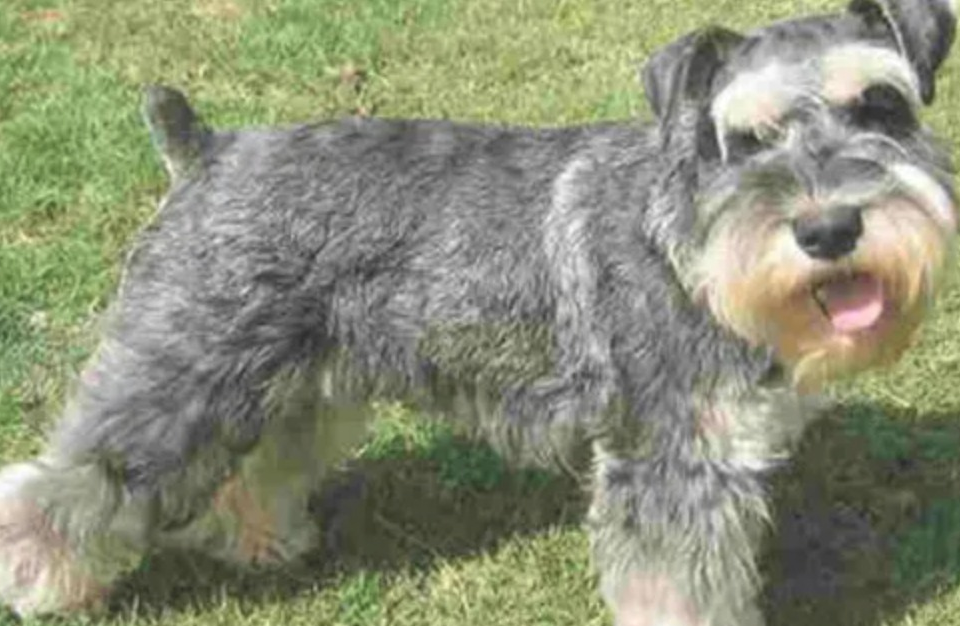

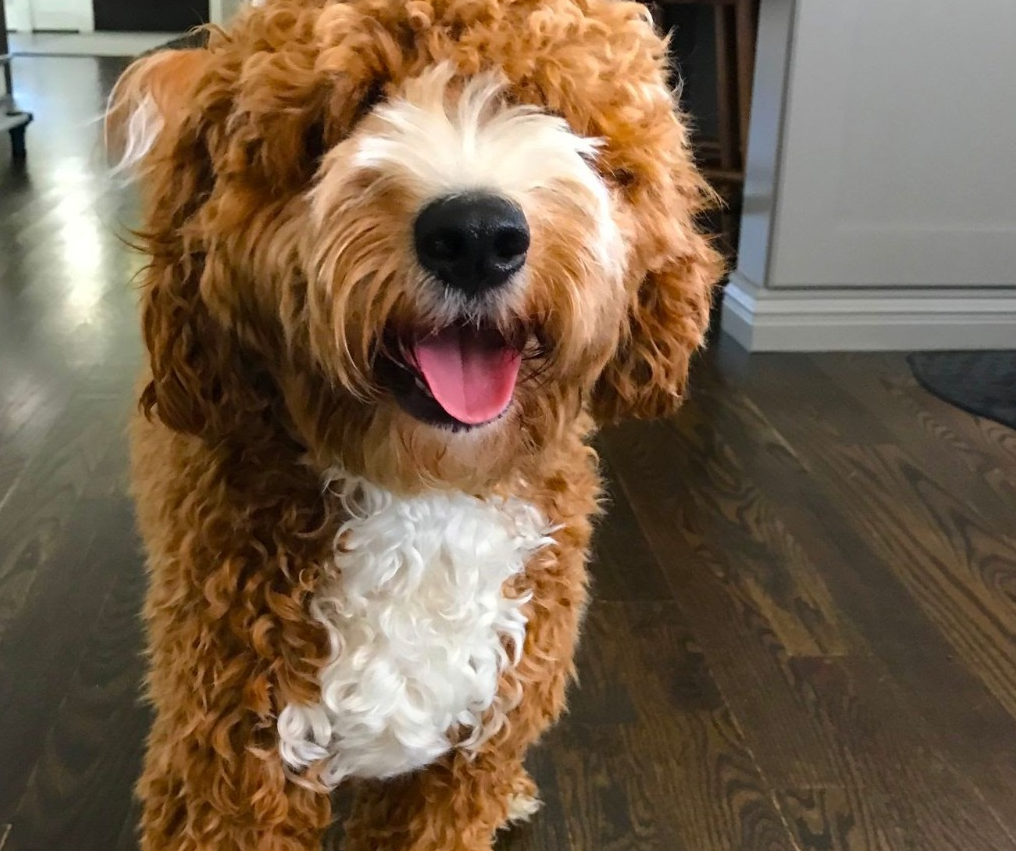

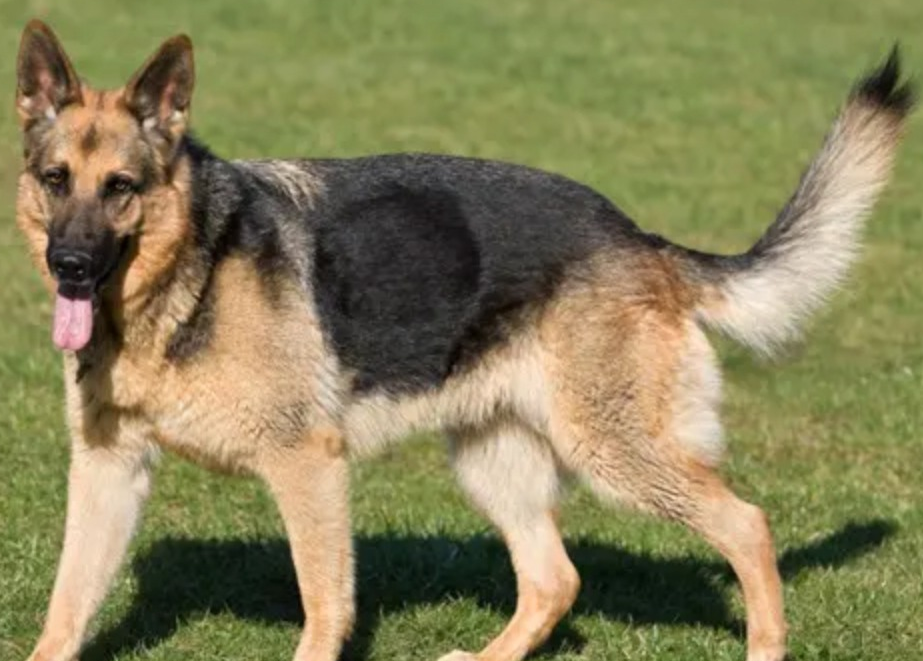

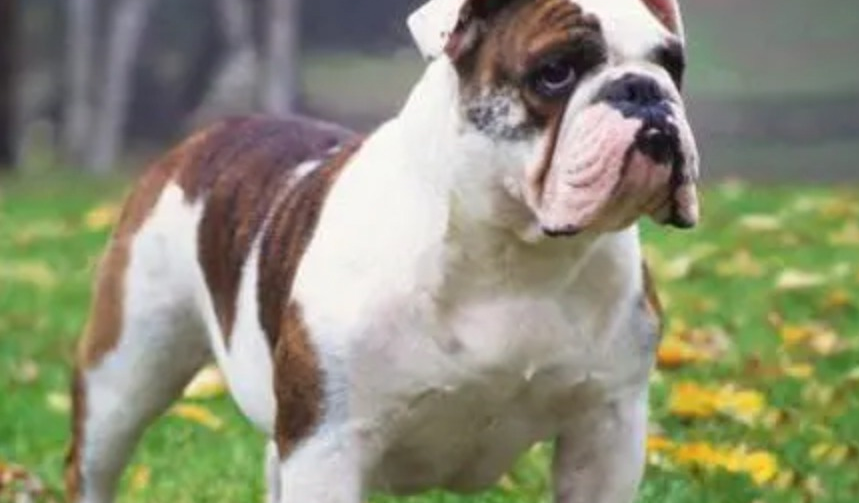

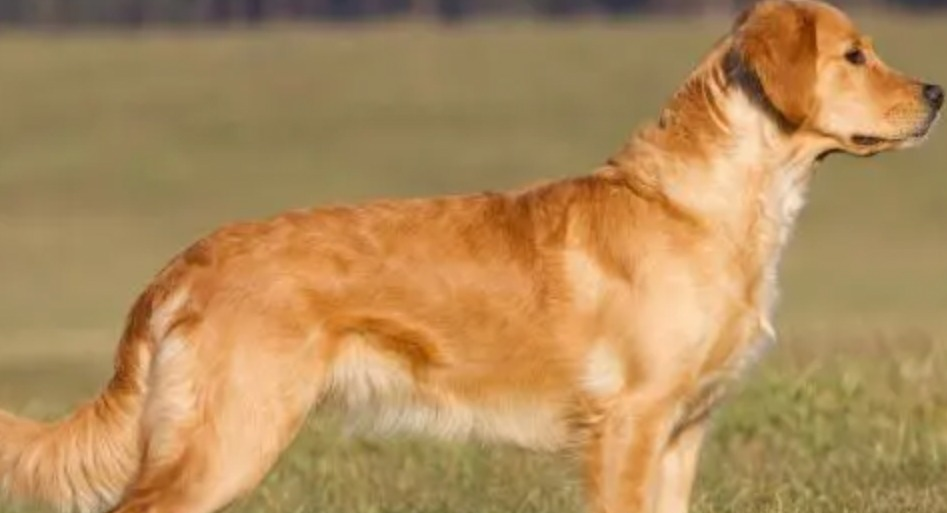

In [122]:
for n in range(5):
  cv2_imshow(cut_imgs[n])